# Clustering

## Датасет 1

Used origin [Backblaze data](https://www.backblaze.com/b2/hard-drive-test-data.html) from 2019y Q1-Q2 here.

In [1]:
import pandas as pd
import glob

# Concatenating all datasets (one dataset per month 2017) to one
##df_bb = pd.concat(map(pd.read_csv, glob.glob("./backblaze_ST4000DM000/*.csv")))
df = pd.concat(map(pd.read_csv, glob.glob("backblaze2019/2019-0[1-3]*.csv")))
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2019-01-01,Z305B2QN,ST4000DM000,4000787030016,0,111.0,35673128.0,NaN,NaN,91.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-01,ZJV0XJQ4,ST12000NM0007,12000138625024,0,83.0,187116872.0,NaN,NaN,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-01-01,ZJV0XJQ3,ST12000NM0007,12000138625024,0,73.0,19599104.0,NaN,NaN,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-01-01,ZJV0XJQ0,ST12000NM0007,12000138625024,0,81.0,136943696.0,NaN,NaN,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-01-01,PL1331LAHG1S4H,HGST HMS5C4040ALE640,4000787030016,0,100.0,0.0,134.0,103.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(9577046, 129)

In [3]:
df['failure'].value_counts()

0    9576602
1        444
Name: failure, dtype: int64

## Preparing data

In [4]:
df1 = df[df['model'] == "ST12000NM0007"]
df1.shape

(2955025, 129)

In [5]:
df1.value_counts()

Series([], dtype: int64)

In [6]:
#df1 = df1[df1.serial_number.duplicated(keep=False)]

# we consider time series with less than 5 elements for failed disks as unpredictable
df1 = df1[df1.groupby('serial_number').serial_number.transform('count') > 5]

In [7]:
df1['failure'].value_counts()

0    2954763
1        173
Name: failure, dtype: int64

In [8]:
df1.shape

(2954936, 129)

In [9]:
df1['serial_number'].value_counts()

ZJV0XJQ4    90
ZJV1KNZY    90
ZJV04N89    90
ZCH0664E    90
ZCH0DMWB    90
            ..
ZCH0DLBV     6
ZJV03CLL     6
ZCH07H2T     6
ZCH050SA     6
ZCH01ZDN     6
Name: serial_number, Length: 34878, dtype: int64

In [10]:
# take only several health disks for learning
health_data = df1[df1.groupby('serial_number').serial_number.transform('count')  == 90]
health_data = health_data[health_data['failure'] == 0]
print("number of different health disks serial numbers", len(health_data['serial_number'].unique()))
serial_numbers_to_drop = health_data['serial_number'].unique()[:30000]
health_data = health_data[health_data['serial_number'].isin(serial_numbers_to_drop)]
health_data.shape
print("health data shape", health_data.shape)

df1 = pd.concat([df1, health_data]).drop_duplicates(keep=False)
df1.shape

number of different health disks serial numbers 30392
health data shape (2735280, 129)
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\katevi\AppData\Local\Temp\ipykernel_9396\3262482152.py", line 10, in <module>
    df1 = pd.concat([df1, health_data]).drop_duplicates(keep=False)
  File "C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py", line 317, in wrapper
    return func(*args, **kwargs)
  File "C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 6664, in drop_duplicates
    duplicated = self.duplicated(subset, keep=keep)
  File "C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 6808, in duplicated
    ids = get_group_index(
  File "C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\sorti

In [ ]:
df1['serial_number'].value_counts()

In [ ]:
df1.select_dtypes(include='object')

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df1['serial_number'])
le.classes_
df1['serial_number'] = le.transform(df1['serial_number'])

In [ ]:
le.fit(df1['date'])
le.classes_
df1['date'] = le.transform(df1['date'])

In [ ]:
df1 = df1.drop(['model'], axis=1)

In [ ]:
# drop all columns which have only NAN values
df1 = df1.dropna(axis=1, how='all')
df1.shape

In [ ]:
df1 = df1.dropna()
df1.shape

In [ ]:
y1 = df1['failure']
X = df1.drop('failure',axis=1)

In [ ]:
X['serial_number'].value_counts()

In [ ]:
y1.value_counts()

## Датасет 2

In [1]:
import pandas as pd

# Concatenating all datasets (one dataset per month 2017) to one
##df_bb = pd.concat(map(pd.read_csv, glob.glob("./backblaze_ST4000DM000/*.csv")))
df_bb = pd.read_csv('./backblaze_ST4000DM000/model_2018_ST4000DM000.csv')
df_bb.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2018-01-01,Z3016TK2,ST4000DM000,4000787030016,0,115.0,87117728.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,W300GLSS,ST4000DM000,4000787030016,1,111.0,40108520.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,Z302SXQ0,ST4000DM000,4000787030016,0,119.0,208926768.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,Z3025L3F,ST4000DM000,4000787030016,1,111.0,30947064.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,Z302SW9C,ST4000DM000,4000787030016,0,117.0,137764288.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df_bb['failure'].value_counts()

0    367482
1     12596
Name: failure, dtype: int64

In [3]:
df_bb_normalized = df_bb[df_bb.columns.drop(list(df_bb.filter(regex='raw')))]
feat_names_normalized = df_bb_normalized.columns.values
print("Dataset with normalized features values", feat_names_normalized)
print(df_bb_normalized.shape)

Dataset with normalized features values ['date' 'serial_number' 'model' 'capacity_bytes' 'failure'
 'smart_1_normalized' 'smart_2_normalized' 'smart_3_normalized'
 'smart_4_normalized' 'smart_5_normalized' 'smart_7_normalized'
 'smart_8_normalized' 'smart_9_normalized' 'smart_10_normalized'
 'smart_11_normalized' 'smart_12_normalized' 'smart_13_normalized'
 'smart_15_normalized' 'smart_22_normalized' 'smart_177_normalized'
 'smart_179_normalized' 'smart_181_normalized' 'smart_182_normalized'
 'smart_183_normalized' 'smart_184_normalized' 'smart_187_normalized'
 'smart_188_normalized' 'smart_189_normalized' 'smart_190_normalized'
 'smart_191_normalized' 'smart_192_normalized' 'smart_193_normalized'
 'smart_194_normalized' 'smart_195_normalized' 'smart_196_normalized'
 'smart_197_normalized' 'smart_198_normalized' 'smart_199_normalized'
 'smart_200_normalized' 'smart_201_normalized' 'smart_220_normalized'
 'smart_222_normalized' 'smart_223_normalized' 'smart_224_normalized'
 'smart_225_n

In [4]:
df_bb_normalized.isnull().sum()

date                         0
serial_number                0
model                        0
capacity_bytes               0
failure                      0
smart_1_normalized          16
smart_2_normalized      380078
smart_3_normalized          16
smart_4_normalized          16
smart_5_normalized          16
smart_7_normalized          16
smart_8_normalized      380078
smart_9_normalized          16
smart_10_normalized         16
smart_11_normalized     380078
smart_12_normalized         16
smart_13_normalized     380078
smart_15_normalized     380078
smart_22_normalized     380078
smart_177_normalized    380078
smart_179_normalized    380078
smart_181_normalized    380078
smart_182_normalized    380078
smart_183_normalized        16
smart_184_normalized        16
smart_187_normalized        16
smart_188_normalized        16
smart_189_normalized        16
smart_190_normalized        16
smart_191_normalized        16
smart_192_normalized        16
smart_193_normalized        16
smart_19

In [5]:
columns_with_values = df_bb_normalized.columns[df_bb_normalized.isnull().sum() <= 32]
df_bb_normalized = df_bb_normalized[columns_with_values]
df_bb_normalized.isnull().sum()

date                     0
serial_number            0
model                    0
capacity_bytes           0
failure                  0
smart_1_normalized      16
smart_3_normalized      16
smart_4_normalized      16
smart_5_normalized      16
smart_7_normalized      16
smart_9_normalized      16
smart_10_normalized     16
smart_12_normalized     16
smart_183_normalized    16
smart_184_normalized    16
smart_187_normalized    16
smart_188_normalized    16
smart_189_normalized    16
smart_190_normalized    16
smart_191_normalized    16
smart_192_normalized    16
smart_193_normalized    16
smart_194_normalized    16
smart_197_normalized    16
smart_198_normalized    16
smart_199_normalized    16
smart_240_normalized    16
smart_241_normalized    16
smart_242_normalized    16
dtype: int64

In [6]:
features_to_drop = ['capacity_bytes', 'smart_10_normalized', 'smart_188_normalized', 'smart_191_normalized', 'smart_192_normalized',
                   'smart_199_normalized', 'smart_240_normalized', 'smart_241_normalized', 'smart_242_normalized']

string_columns = ['serial_number', 'date', 'model']

In [7]:
# filter by date
df_bb_normalized = df_bb_normalized[(df_bb_normalized['date'] >= "2018-01-01") & (df_bb_normalized['date'] <= "2018-03-31")]

In [8]:
df_bb_normalized = df_bb_normalized.drop(features_to_drop, axis=1)
df_bb_normalized = df_bb_normalized.drop(string_columns, axis=1)

df_bb_normalized.shape

(238297, 17)

In [9]:
import numpy as np

numeric_data = df_bb_normalized.select_dtypes([np.number])
numeric_mean = numeric_data.mean()
numeric_features = numeric_data.columns

df_bb_normalized = df_bb_normalized.fillna(numeric_mean)

In [10]:
X = df_bb_normalized.drop('failure', axis=1)
y1 = df_bb_normalized['failure']

## PCA 

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.814815,0.555556,1.0,1.0,0.96875,0.191489,1.0,1.0,1.0,1.0,0.979798,0.126506,0.979798,0.119048,1.0,1.0
1,0.666667,0.111111,1.0,1.0,0.71875,0.106383,1.0,1.0,1.0,1.0,0.969697,0.162651,0.696970,0.071429,1.0,1.0
2,0.962963,0.333333,1.0,1.0,1.00000,0.510638,1.0,1.0,1.0,1.0,1.000000,0.120482,0.898990,0.126984,1.0,1.0
3,0.666667,0.111111,1.0,1.0,0.84375,0.319149,1.0,1.0,1.0,1.0,0.898990,0.168675,0.949495,0.063492,1.0,1.0
4,0.888889,0.111111,1.0,1.0,1.00000,0.531915,1.0,1.0,1.0,1.0,1.000000,0.090361,0.949495,0.166667,1.0,1.0


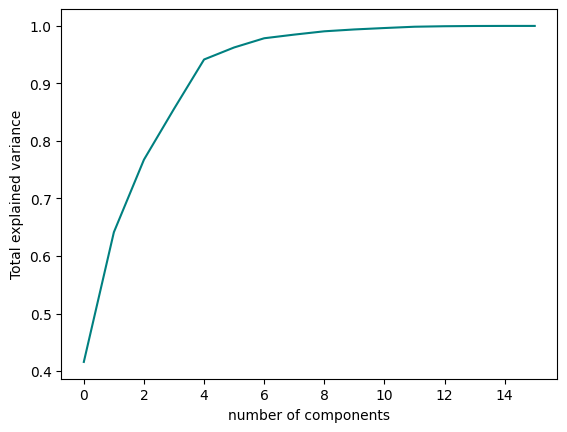

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pca = PCA().fit(df_scaled) 
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='teal') 
plt.xlabel('number of components') 
plt.ylabel('Total explained variance'); 

In [13]:
pca = PCA(0.80).fit(df_scaled)
pca.n_components_ 

4

In [14]:
pca = PCA(0.95).fit(df_scaled)
pca.n_components_ 

6

## Визуализация кластеров полученных снижением размерности с помощью PCA

In [15]:
pca = PCA(n_components=2)
pca.fit(df_scaled)
X_pca = pca.transform(df_scaled)

In [16]:
df_pca = pd.DataFrame(X_pca, columns =['Component 1', 'Component 2'])
df_pca.head(2)

,Component 1,Component 2
0,-0.282698,0.007339
1,0.218969,-0.092347


In [17]:
y1.reset_index(inplace=True, drop=True)
y1

0         0
1         1
2         0
3         1
4         0
         ..
238292    0
238293    0
238294    0
238295    0
238296    0
Name: failure, Length: 238297, dtype: int64

In [18]:
df_pca = pd.concat([df_pca, y1], axis=1)
df_pca.head()

,Component 1,Component 2,failure
0,-0.282698,0.007339,0
1,0.218969,-0.092347,1
2,-0.268072,0.048605,0
3,-0.051630,-0.203060,1
4,-0.182454,-0.103483,0


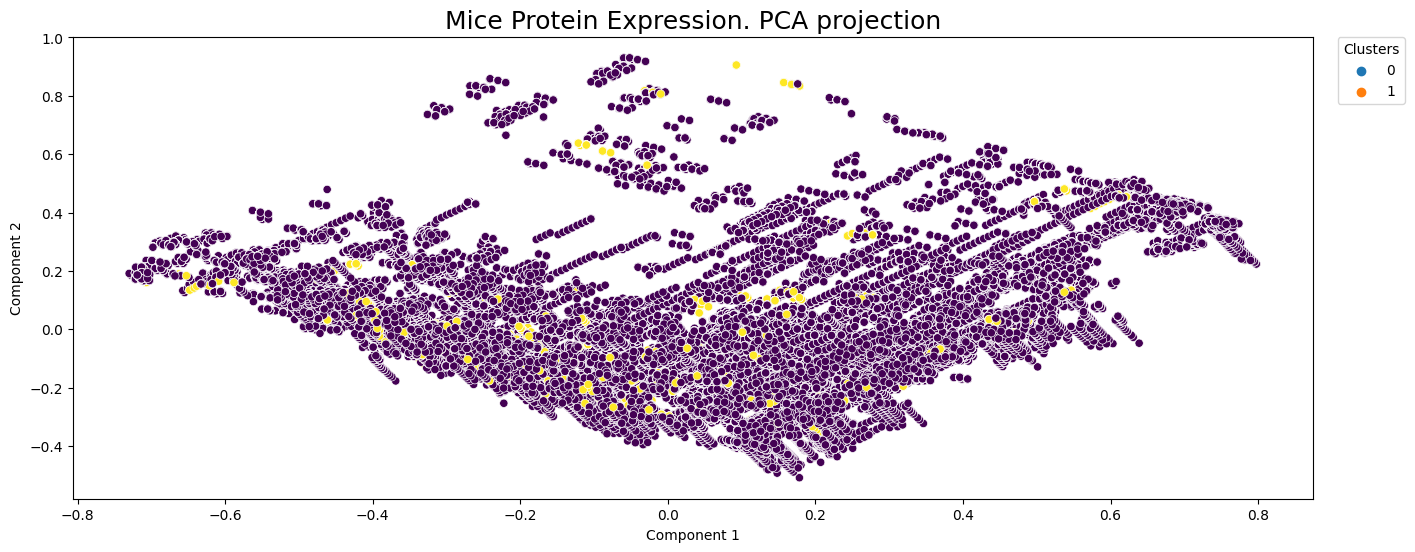

In [19]:
plt.figure(figsize=(16, 6)) 

sns.scatterplot(x = 'Component 1', y = 'Component 2', data = df_pca, c=y1, hue = 'failure')
plt.title('Mice Protein Expression. PCA projection', fontsize=18)
plt.legend(title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize='medium')

plt.show()


## Подбор гиперпараметров

In [32]:
from sklearn.decomposition import PCA

components = [7]
X_reduced = []
for reduced_dims in components:
    pca = PCA(n_components=reduced_dims)
    X_transformed = pca.fit_transform(df_scaled)
    X_reduced.append(X_transformed)

In [33]:
import pathlib
import itertools
import time
from sklearn.base import clone
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score

RESULTS_PATH = pathlib.Path("cv_results.csv")


def train_and_store(estimator, param_grid: dict | None = None):
    param_grid = param_grid if param_grid is not None else {}
    param_combs = [
        dict(params) for params in
        itertools.product(
            *([(name, v) for v in vs] for (name, vs) in param_grid.items())
        )
    ]

    results = []
    for X in X_reduced:
        best_ari = None
        best_ami = None
        best_fmi = None

        for params in param_combs:
            print("new iteration...")
            cloned_estimator = clone(estimator).set_params(**params)

            start_t = time.perf_counter()
            pred = cloned_estimator.fit_predict(X)
            fit_predict_time_s = (time.perf_counter() - start_t)

            ari = adjusted_rand_score(y1, pred)
            if best_ari is None or ari > best_ari[0]:
                best_ari = ari, fit_predict_time_s, params

            ami = adjusted_mutual_info_score(y1, pred)
            if best_ami is None or ami > best_ami[0]:
                best_ami = ami, fit_predict_time_s, params

            fmi = fowlkes_mallows_score(y1, pred)
            if best_fmi is None or fmi > best_fmi[0]:
                best_fmi = fmi, fit_predict_time_s, params

        print(
            f"Best params for {X.shape[1]}:",
            f"By ARI: {best_ari[2]}",
            f"By AMI: {best_ami[2]}",
            f"By FMI: {best_fmi[2]}",
            "",
            sep="\n",
        )

        results.append(
            {
                "Clusterer": estimator.__class__.__name__,
                "Input dimension": X.shape[1],
                "fit_predict time, s": np.mean([best_ari[1], best_ami[1], best_fmi[1]]),
                "ARI": best_ari[0],
                "AMI": best_ami[0],
                "FMI": best_fmi[0],
            })
        print({
                "Clusterer": estimator.__class__.__name__,
                "Input dimension": X.shape[1],
                "fit_predict time, s": np.mean([best_ari[1], best_ami[1], best_fmi[1]]),
                "ARI": best_ari[0],
                "AMI": best_ami[0],
                "FMI": best_fmi[0],
        })

    pd.DataFrame(results).to_csv(RESULTS_PATH, mode="a", header=not RESULTS_PATH.exists())

## KMeans

In [40]:
from sklearn.cluster import KMeans

model = KMeans(random_state=42)
hyper_parameters = {
        "algorithm": ["lloyd", "elkan"],
        "max_iter": [1000, 5000, 10000],
        "n_clusters": range(2,20)
    }

kmeans_results = train_and_store(model, hyper_parameters)
kmeans_results

Best params for 4:
By ARI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 5}
By AMI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 4}
By FMI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 2}

Best params for 7:
By ARI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 7}
By AMI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 4}
By FMI: {'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 2}



## OPTICS

In [34]:
%%time

from sklearn.cluster import OPTICS

hyper_parameters = {
   "metric": ["cityblock", "l1", "l2", "manhattan"],
   "cluster_method": ["xi", "dbscan"],
    "n_jobs": [-1],
    
}

optics = OPTICS()
train_and_store(optics, hyper_parameters)

new iteration...


C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


new iteration...
new iteration...


C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


new iteration...
new iteration...


C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


new iteration...
new iteration...


C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:903: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


new iteration...
Best params for 7:
By ARI: {'metric': 'cityblock', 'cluster_method': 'dbscan', 'n_jobs': -1}
By AMI: {'metric': 'cityblock', 'cluster_method': 'xi', 'n_jobs': -1}
By FMI: {'metric': 'cityblock', 'cluster_method': 'dbscan', 'n_jobs': -1}

{'Clusterer': 'OPTICS', 'Input dimension': 7, 'fit_predict time, s': 5823.699190433351, 'ARI': 0.0, 'AMI': 0.008748923787286304, 'FMI': 0.9697238535988204}
CPU times: total: 13h 41min 28s
Wall time: 13h 24min 58s


## Bisecting KMeans

In [ ]:
%%time

from sklearn.cluster import BisectingKMeans

bisect_kmeans = BisectingKMeans(random_state=0)

hyper_parameters = {
        "algorithm": ["lloyd", "elkan"],
        "max_iter": [1000, 5000, 10000],
        "n_clusters": range(2,20)
}

bkmeans_results = train_and_store(bisect_kmeans, hyper_parameters)
bkmeans_results

## Mean shift

In [28]:
%%time 

from sklearn.cluster import MeanShift

ms = MeanShift(n_jobs=-1)
hyper_parameters = {
    "max_iter": [1000, 5000, 10000]
}
train_and_store(ms, hyper_parameters)

Best params for 4:
By ARI: {'max_iter': 1000}
By AMI: {'max_iter': 1000}
By FMI: {'max_iter': 1000}

Best params for 7:
By ARI: {'max_iter': 1000}
By AMI: {'max_iter': 1000}
By FMI: {'max_iter': 1000}

CPU times: total: 14h 36min 46s
Wall time: 1d 2h 45min 45s


## Spectral clustering

In [35]:
%%time

from sklearn.cluster import SpectralClustering

sc = SpectralClustering(random_state=42, n_jobs=-1)
hyper_parameters = {
    "n_clusters": [5, 10],
    "affinity": ["nearest_neighbors"],
    "assign_labels": ["kmeans", "discretize", "cluster_qr"],
}
train_and_store(sc, hyper_parameters)

new iteration...


C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


new iteration...


C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


new iteration...


C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


new iteration...


C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


new iteration...


C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


new iteration...


C:\Users\katevi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Best params for 7:
By ARI: {'n_clusters': 10, 'affinity': 'nearest_neighbors', 'assign_labels': 'kmeans'}
By AMI: {'n_clusters': 10, 'affinity': 'nearest_neighbors', 'assign_labels': 'kmeans'}
By FMI: {'n_clusters': 10, 'affinity': 'nearest_neighbors', 'assign_labels': 'kmeans'}

{'Clusterer': 'SpectralClustering', 'Input dimension': 7, 'fit_predict time, s': 25367.726373200014, 'ARI': 0.00493495927764427, 'AMI': 0.000534027682319964, 'FMI': 0.9350673799084486}
CPU times: total: 1d 20h 1min 24s
Wall time: 1d 2h 14min 53s


## Memory intensive algorithms
## Agglomerative clustering

In [ ]:
print("hello")

In [42]:
%%time 

from sklearn.cluster import AgglomerativeClustering

model_agc = AgglomerativeClustering()

hyper_parameters = {
    #"n_clusters": [10, 20, 50, 100, 300],
    "affinity": ["cityblock", "cosine", "l1", "l2", "manhattan"],
    "linkage": ["complete", "average"],
}

train_and_store(model_agc, hyper_parameters)

MemoryError: Unable to allocate 212. GiB for an array with shape (28392610956,) and data type float64

## DBSCAN

In [ ]:
%%time
from sklearn.cluster import DBSCAN

model_dbscan = DBSCAN(n_jobs=-1)
hyper_parameters ={
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "metric": ["cityblock", "l1", "l2", "manhattan"],
}

train_and_store(model_dbscan, hyper_parameters)